<a href="https://colab.research.google.com/github/Mohammed-Fayaz-Ahamed/DataScience_assignment/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import pandas as pd
import warnings as wr
wr.filterwarnings('ignore')

# Data collection
dt = pd.read_csv('/content/delivery_time.csv')
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [148]:
dt.shape # checking the dataframe shape

(21, 2)

In [149]:
dt.dtypes # data types

Delivery Time    float64
Sorting Time       int64
dtype: object

In [150]:
dt.isnull().sum()  # Cheacking for the missing values

Delivery Time    0
Sorting Time     0
dtype: int64

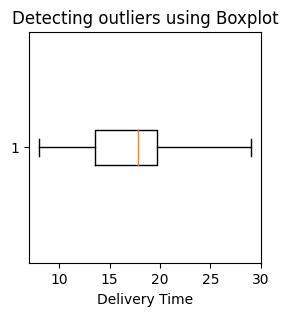

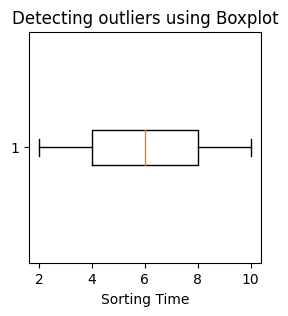

In [151]:
# Checking for any outliers

import matplotlib.pyplot as plt

for i in dict(dt.dtypes):
 if dict(dt.dtypes)[i] == 'int64' or dict(dt.dtypes)[i] ==  'float64':
  plt.figure(figsize =(3,3))
  plt.boxplot(dt[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

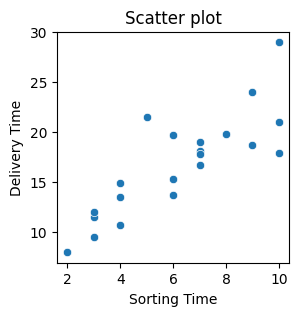

In [152]:
# Data Visualization

import seaborn as sns

plt.figure(figsize =(3,3))
sns.scatterplot(x = dt['Sorting Time'], y= dt['Delivery Time'], data = dt)
plt.title('Scatter plot')
plt.show()

In [153]:
# Data Summary

dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [154]:
# lets assign a variables to the columns

x = dt[['Sorting Time']]
y = dt[['Delivery Time']]

from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x,y , test_size= 0.2)


In [155]:
x_train.shape

(16, 1)

In [156]:
x_test.shape # 20% of the sorting time column from the main dataframe

(5, 1)

In [157]:
from sklearn.linear_model import LinearRegression  # importing the linear regression model
reg= LinearRegression()   # Assigning the model to a variable reg
reg.fit(x_train,y_train) # training the model


LinearRegression()

In [158]:
# Now our model is ready to test

reg.predict([[4]]) # gave a random sorting time 4

array([[12.77417631]])

In [159]:
# Checking for the test variables

y_pred =reg.predict(x_test)
y_pred

array([[16.2084022 ],
       [19.6426281 ],
       [17.92551515],
       [14.49128926],
       [11.05706336]])

Text(0.5, 1.0, 'Sorting Time - Delivery Time Data')

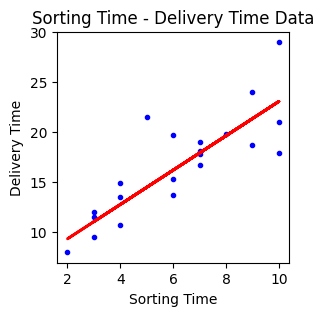

In [160]:
# Lets see the best fit line

plt.figure(figsize =(3,3))
plt.scatter(dt[['Sorting Time']], dt[['Delivery Time']], color = 'blue', marker = '.')
plt.plot(x_train, reg.predict(x_train), color = 'red',linewidth= 2)
plt.ylabel('Delivery Time')
plt.xlabel('Sorting Time')
plt.title('Sorting Time - Delivery Time Data')

In [161]:
# Performance of the model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_train,reg.predict(x_train))
mset = mean_squared_error(y_test,reg.predict(x_test))
mae = mean_absolute_error(y_train, reg.predict(x_train))
maet = mean_absolute_error(y_test, reg.predict(x_test))
r2 = r2_score(y_test,reg.predict(x_test))
r2t = r2_score(y_train,reg.predict(x_train))


print("Mean squared Error for train: ", mse)
print("Mean squared Error for test: ", mset)
print('Mean Absolute Error for train: ', mae)
print('Mean Absolute Error for test: ', maet)
print('R - square for test: ', r2)
print('R - square for train: ', r2t)

Mean squared Error for train:  6.887397155647385
Mean squared Error for test:  11.086220688204362
Mean Absolute Error for train:  2.123008953168044
Mean Absolute Error for test:  2.056381267217632
R - square for test:  0.21132999525609675
R - square for train:  0.7521773535061622


In [162]:
### Linear Regression for salary hike


ds = pd.read_csv('/content/Salary_Data.csv')
ds

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [163]:
ds.shape # checking the dataframe shape

(30, 2)

In [164]:
ds.dtypes # data types

YearsExperience    float64
Salary             float64
dtype: object

In [165]:
ds.isnull().sum()  # Cheacking for the missing values

YearsExperience    0
Salary             0
dtype: int64

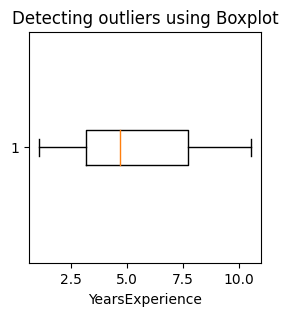

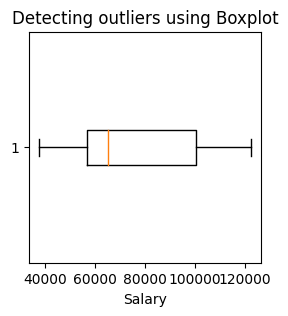

In [166]:
# Checking for any outliers

import matplotlib.pyplot as plt
for i in dict(ds.dtypes):
 if dict(ds.dtypes)[i] == 'int64' or dict(ds.dtypes)[i] ==  'float64':
  plt.figure(figsize =(3,3))
  plt.boxplot(ds[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

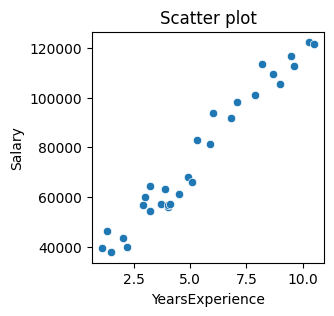

In [167]:
# Data Visualization

import seaborn as sns

plt.figure(figsize =(3,3))
sns.scatterplot(x = ds['YearsExperience'], y= ds['Salary'], data = ds)
plt.title('Scatter plot')
plt.show()

In [168]:
# Data Summary

ds.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [169]:
# lets assign a variables to the columns

xs = ds[['YearsExperience']]
ys = ds[['Salary']]

In [170]:
xs_train, xs_test, ys_train, ys_test = tts(xs,ys , test_size= 0.2)

In [171]:
xs_train.shape

(24, 1)

In [172]:
xs_test.shape

(6, 1)

In [173]:
from sklearn.linear_model import LinearRegression  # importing the linear regression model
reg2= LinearRegression()   # Assigning the model to a variable reg
reg2.fit(xs_train,ys_train) # training the model

LinearRegression()

In [174]:
# Now our model is ready to test

reg2.predict([[5]]) # gave a random sorting time 5

array([[73383.63417165]])

In [175]:
# Checking for the test variables

ys_pred =reg2.predict(xs_test)
ys_pred

array([[125894.57990043],
       [102116.03843834],
       [ 64466.68112337],
       [118959.17197398],
       [127876.12502227],
       [ 36725.0494176 ]])

Text(0.5, 1.0, 'Salary hike Data')

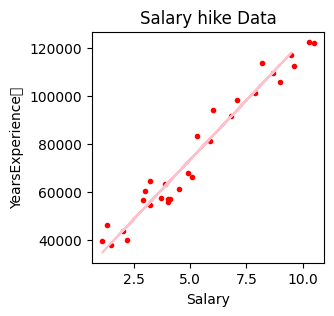

In [176]:
# Lets see the best fit line

plt.figure(figsize =(3,3))
plt.scatter(ds[['YearsExperience']], ds[['Salary']], color = 'red', marker = '.')
plt.plot(xs_train, reg2.predict(xs_train), color = 'pink')
plt.ylabel('YearsExperience	')
plt.xlabel('Salary')
plt.title('Salary hike Data')

In [177]:
# Performance of the model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mses = mean_squared_error(ys_train,reg2.predict(xs_train))
msest = mean_squared_error(ys_test,reg2.predict(xs_test))
maes = mean_absolute_error(ys_train, reg2.predict(xs_train))
maest = mean_absolute_error(ys_test, reg2.predict(xs_test))
r2s = r2_score(ys_test,reg2.predict(xs_test))
r2st = r2_score(ys_train,reg2.predict(xs_train))


print("Mean squared Error for train: ", mses)
print("Mean squared Error for test: ", msest)
print('Mean Absolute Error for train: ', maes)
print('Mean Absolute Error for test: ', maest)
print('R - square for test: ', r2s)
print('R - square for train: ', r2st)

Mean squared Error for train:  31696978.471485864
Mean squared Error for test:  38900024.63969856
Mean Absolute Error for train:  4631.83102554326
Mean Absolute Error for test:  5585.257840131441
R - square for test:  0.9585420245931291
R - square for train:  0.9450650276462569
